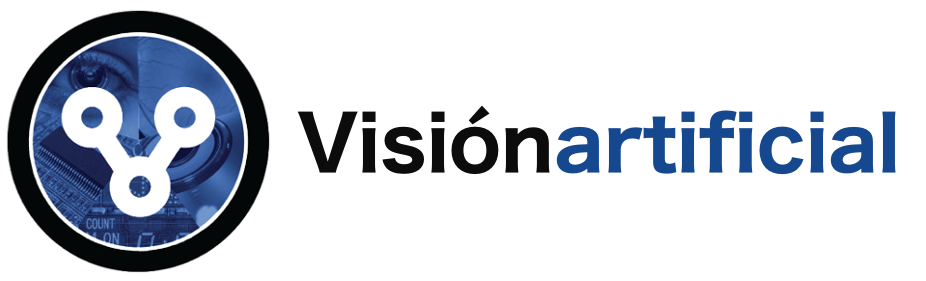

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Filtro de Kalman</font>

# <font style="color:rgb(50,120,229)">Revisión</font>


Neste caderno, coñeceremos unha técnica chamada Filtro de Kalman que deriva da ciencia de foguetes espaciais. O filtro de Kalman era parte integrante do sistema de navegación utilizado polo programa Apolo que fixo aterrar un home na Lúa en 1969. Ademais, segundo Wikipedia: "os filtros Kalman foron vitais na implementación dos sistemas de navegación dos submarinos de mísiles balísticos nucleares da Mariña dos Estados Unidos e nos sistemas de orientación e navegación dos mísiles de cruceiro como o mísil Tomahawk. tamén se usa nos sistemas de orientación e navegación de vehículos de lanzamento reutilizables e nos sistemas de control de altitude e navegación das naves espaciais que atracan na Estación Espacial Internacional".

O filtro Kalman (tamén chamado Filtro Kalman-Bucy) foi desenvolvido por Rudolf E. Kalman e Richard S. Bucy en dous artigos presentados nunha revista de enxeñería mecánica en 1960 e 1961. Esta técnica, aínda que atribuida a Kalman,  o físico Peter Swerling inventou de xeito independente o filtrado de Kalman e publicouno nunha revista de astronomía un **ano antes que o fixera Kalman**.

O filtro Kalman está no corazón de todos os [sistemas de navegación inercial](https://en.wikipedia.org/wiki/Inertial_navigation_system). Polo tanto, todos os voos comerciais tamén usan un filtro Kalman no seu sistema de navegación. Por suposto, tamén se usa na navegación de robots e vehículos autónomos.

Neste módulo, aprenderemos a usar o filtrado de Kalman para o seguimento de obxectos.




# <font style="color:rgb(50,120,229)">Que é o filtro de Kalman?</font>


Comprender o filtro Kalman en abstracto pode ser difícil, como a maioría dos outros conceptos matemáticos. Entón, nesta sección, explicaremos o filtro de Kalman usando un exemplo específico.

Imaxina que queres construír un dron que poida voar a un lugar específico ao longo dun camiño especificado. O dron está equipado cun GPS, pero por suposto non pode confiar completamente no GPS para navegar porque:

1. O GPS só é preciso ata uns poucos metros e a súa precisión para a elevación é aínda peor.

2. O sinal GPS pode non ser moi fiable ao longo do camiño planificado. O dron debería poder ir sen o sinal GPS durante algún tempo.

Entón o filtro de Kalman adopta a seguinte estratexia.

1. **Predicir:** Fai predicións sobre o estado interno do sistema (por exemplo, a posición e a velocidade do dron) en función do estado interno anterior e de calquera entrada de control (por exemplo, a forza da hélice).

2. **Actualización:** cando estean dispoñibles novas medicións (por exemplo, información GPS) sobre partes do estado interno, utilízaa para actualizar a predición feita no primeiro paso.



## <font style="color:rgb(50,120,229)">Ecuación de transición de estados</font>

Primeiro comprenderemos o paso **predicir** do filtro de Kalman.

En calquera momento do voo do dron, quere coñecer a súa localización con precisión. Usemos un modelo de movemento sinxelo para o voo. A localización no paso $k$ pódese predicir usando a localización no paso $k-1$, a velocidade rexistrada no paso $k-1$ e o tempo transcorrido no medio. Supoñamos que non hai aceleración.

As seguintes ecuacións describen o modelo de movemento.
$$
\pmb{p_k} = \pmb{p_{k−1}} + \pmb{v_{k−1}} \Delta t   \hspace{5cm} (1)       
$$ 

$$
\pmb{v_{k}} = \pmb{v_{k−1}} \hspace{7cm} (2)
$$

Where, 

$\pmb{p}$ posición 3D 

$\pmb{v}$ é o vector velocidade 3D  

$\Delta t$ é o tempo trancorrido 

A posición $\pmb{p_k}$ e a velocidade $\pmb{v_k}$ xuntos chámanse **estado** do sistema. As ecuacións (1) e (2) pódense combinar nunha **ecuación de transición de estado** dada por

$$
\begin{bmatrix}\pmb{p_k} \\ \pmb{v_k}\end{bmatrix} = \pmb{F_k} \begin{bmatrix}\pmb{p_{k−1}} \\ \pmb{v_{k−1}}\end{bmatrix} \hspace{6cm}(3) 
$$ 

A matriz $\pmb{F_k}$ chámase **matriz de transición de estado**. Podemos ampliar a ecuación (3) para ver os detalles internos.

$$
  \begin{bmatrix}
   x_k \\
   y_k \\
   z_k \\
   u_k \\
   v_k \\
   w_k \\
  \end{bmatrix}=\begin{bmatrix}
   1 & 0 & 0 & \Delta t & 0 & 0\\
   0 & 1 & 0 & 0 & \Delta t & 0\\
   0 & 0 & 1 & 0 & 0 & \Delta t\\
   0 & 0 & 0 & 1 & 0 & 0\\
   0 & 0 & 0 & 0 & 1 & 0\\
   0 & 0 & 0 & 0 & 0 & 1\\
  \end{bmatrix}
  \quad
  \begin{bmatrix}
   x_{k-1} \\
   y_{k-1} \\
   z_{k-1} \\
   u_{k-1} \\
   v_{k-1} \\
   w_{k-1} \\
  \end{bmatrix} \hspace{1cm}(4)
$$  


**<font style="color:rgb(255,0,0)">Nota:</font>** Os símbolos escritos con letra negra son unha matriz ou un vector. Calquera símbolo escrito con fonte normal é un escalar. Así, $\pmb{p}=[x,y,z]^T$ é a posición 3D e $\pmb{v}=[u,v,w]^T$ é a velocidade 3D (por exemplo, $u$ é a velocidade na dimensión x).

Como se mencionou anteriormente, a posición e a velocidade xuntas forman o estado do sistema. Definamos o vector de estado como: $\pmb{x_k} = \begin{bmatrix}\pmb{p_k} \\ \pmb{v_k}\end{bmatrix}$

Agora, a ecuación (3) pódese reescribir como

$$ 
\pmb{x_k} = \pmb{F_k}    \pmb{x_{k−1}} \hspace{9cm}(5)  
$$

## <font style="color:rgb(50,120,229)">Modelando as incertidumes</font>


Aínda que podemos predecir a posición e a velocidade, a nosa predición é probabilística o cal leva asociadas incertezas. Estas adoitan modelarse usando unha distribución gaussiana cunha media ($\mu$) e unha varianza ($\delta^2$). Supón que alguén che pide que adiviñes a hora local actual mentres estás atrapado nun aburrido traballo de oficina que che fai revisar o teu reloxo dez veces nunha hora para o descanso do xantar. A hora actual é a media. Facendo unha predición sen mirar o reloxo, é probable que esteas desfasado nuns minutos. Pero xa que consultaches o teu reloxo con bastante frecuencia, a túa estimación de tempo terá unha variación baixa en torno á media. Agora saes cos amigos un venres pola noite de fai festa e alguén che volta a preguntar a hora (asumindo que estás en condicións de responder á pregunta) é probable que a túa resposta estea desviada nunha marxe maior. Noutras palabras, a túa estimación terá unha gran varianza.

Volta aos drons. No noso caso, o vector de estado ten 6 elementos: tres para a posición e tres para a velocidade. Neste caso, podemos modelar as incertezas usando unha gaussiana multivariada cun vector medio 6x1 e unha matriz de covarianza 6x6. Podes estar tentado a pensar por que non temos un vector de varianzas 6x1 para modelar a incerteza en cada elemento. A razón é que algunhas das dimensións poden estar correlacionadas. Por exemplo, a posición na dimensión x está correlacionada coa velocidade na dimensión x. As entradas fóra da diagonal da matriz de covarianza captan esta correlación.

En calquera momento, mantemos o vector de estado $\pmb{x_k}$ e a matriz de covarianza $\pmb{P_k}$ para que non só saibamos cal é a nosa predición actual, senón tamén o certo que podemos estar sobre a nosa propia estimación.

Sabemos que podemos usar a ecuación (5) para actualizar $\pmb{x_k}$. Como actualizamos a matriz de covarianza $\pmb{P_k}$?

**Identidade matemática**

Se a distribución da variable aleatoria $\pmb{y}$ ten covarianza $\pmb{\Sigma}$, entón a matriz de covarianza para a variable aleatoria $\pmb{Ay}$ vén dada por $\pmb{A\Sigma A^ T}$

Nota: $\pmb{A}$ é unha matriz arbitraria.


Segundo a identidade anterior, $\pmb{P_k}$ ten a seguinte ecuación de actualización.

## <font style="color:rgb(50,120,229)">Entrada de Control</font>

Ata agora, creamos unha ecuación para predecir a localización e a velocidade do dron baseada na localización e velocidade anteriores a través da ecuación (5). Tamén puidemos actualizar a matriz de covarianza que representa a incerteza nas nosas estimacións mediante a ecuación (6). Pero esa non é a historia completa.

O estado do dron tamén pode verse influenciado por algunhas entradas de control. Por exemplo, baseándose nalgúns cálculos internos feitos para corrixir o rumbo, o dron pode impulsarse nunha determinada dirección. Estes controis externos están modelados usando un vector $\pmb{u}$.


$$ 
\pmb{x_k} = \pmb{F_k}    \pmb{x_{k−1}} + \pmb{B_k u_k} \hspace{7cm}(7)
$$

Na ecuación anterior, a matriz $\pmb{B_k}$ chámase matriz de control. Ilustra o mecanismo polo cal $\pmb{u_k}$ inflúe no estado $\pmb{x_k}$. Por exemplo, se $\pmb{u_k}$ é o vector da aceleración en 3D e se lembras a cinemática do movemento da física do instituto, $\pmb{B_k}$ sería como

$$
\pmb{B_k} = \begin{bmatrix} \frac{(\Delta t)^2}{2} & 0 & 0 \\ 0 & \frac{(\Delta t)^2}{2}  & 0 \\ 0 & 0 & \frac{(\Delta t)^2}{2} \\ \Delta t & 0 & 0\\ 0 & \Delta t & 0\\ 0 & 0 & \Delta t \end{bmatrix} \hspace{6cm}(8)
$$

## <font style="color:rgb(50,120,229)">Incertidumes incontroladas</font>


Só para resumir, ata agora puidemos modelar o estado do sistema en base a

1. Estado anterior

2. Entrada de control coñecida

Pero despois hai cousas que están fóra do noso control que afectan ao estado do dron. Por exemplo, a navegación do dron podería verse afectada por unha brisa. Estas incertezas modelízanse como un ruído gaussiano de media cero con covarianza $\pmb{Q_k}$. Entón, agora podemos actualizar as nosas ecuacións do seguinte xeito.

$$ {\pmb{x_k} = \pmb{F_k}    \pmb{x_{k−1}} + \pmb{B_k u_k} \\
\pmb{P_k} = \pmb{F_k}    \pmb{P_{k−1}} \pmb{F^T_k} + \pmb{Q_k}} \hspace{8cm}(9)
$$


Isto completa o **paso de predición** do filtro de Kalman.

## <font style="color:rgb(50,120,229)">Medidas</font>

Ata agora, centrámonos en predicir o estado do sistema baseándonos en entradas de estado e control anteriores. Tamén tentamos incorporar incertezas aleatorias fóra do noso control.

Agora pasamos ao paso **actualización** do filtro de Kalman.

Lembra que o noso dron tamén ten un GPS que pode axudarnos a estimar a localización. Chamémoslle $\pmb{z_k}$. É un vector de posición 3D e esta estimación tamén ten algunhas incertezas modeladas mediante unha matriz de covarianza $\pmb{R_k}$. Cando esta información estea dispoñible, deberíamos combinala sen a nosa estimación actual das seccións anteriores para elaborar unha estimación mellor.

Non obstante, o GPS só ofrece información de localización e o noso estado ten información tanto de localización como de velocidade.

Non te inquietes! todo o que necesitamos é unha **Matriz de Observación** ($\pmb{H_k}$) que mapee o estado actual ao espazo de observación (é dicir, a información do GPS). Así que $\pmb{H_kx_k}$ e $\pmb{z_k}$ son cantidades que podes comparar (é dicir, están no mesmo espazo). No noso caso,


$$
\pmb{H_k} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1  & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \end{bmatrix}
$$

Cando multiplicamos $\pmb{H_k}$ por $\pmb{x_k}$, simplemente mantemos os termos de localización e descartamos os termos de velocidade.

A matriz de covarianza para $\pmb{H_kx_k}$ é simplemente $\pmb{H_kP_k{H_k}^T}$ (usando a identidade comentada anteriormente).


## <font style="color:rgb(50,120,229)">Fusionando a información</font>


Antes de seguir adiante imos facer unha disgresión para entender a fusión de información.

Supoñamos que temos dúas estimacións dunha cantidade (por exemplo, temperatura) de dous sensores diferentes. Un sensor estima que a temperatura é de $5^o$C. Pero sabemos que non se pode confiar completamente nel. É ruidoso cunha desviación estándar de 2. O outro sensor é un pouco máis preciso cunha desviación estándar de 1,5. Está informando que a temperatura é de $10^o$C.

Demostramos a situación graficamente a continuación.


<center><img src="visuais/opcv4face-w8-m2-fusingTempGraph1.png" width=400/></center>

<center>Figura 1: Dous sensores de temperatura ruidosos proporcionan dúas estimacións de temperatura. O de azul estima que a temperatura é de $5^o$C e o vermello estima que a temperatura é de $10^o$C. O sensor vermello, cunha varianza menor, implica que confiamos máis na súa estimación.</center>

En que sensor debemos confiar? Confiamos máis no sensor vermello, pero iso non significa que a información do sensor azul sexa inútil. Resulta que podemos combinar as dúas fontes de información simplemente multiplicando as dúas gaussianas.

A figura 2 ilustra isto graficamente. A nova estimación, mostrada mediante a curva verde, está lixeiramente cara ao sensor vermello porque este é máis preciso que o azul. Ten en conta tamén que a $\sigma$ da nova curva verde é inferior ás $\sigma$s das outras dúas curvas, o que indica que estamos máis seguros sobre a información despois de fusionar as dúas fontes de datos.

<center><img src="visuais/opcv4face-w8-m2-fusingTempGraph.png" width=400/></center>

<center>Figura 2: a información da curva azul e vermella pódese combinar simplemente multiplicándoas e normalizando para que a área baixo a curva verde sume un. </center>

Agora, volvamos ao noso problema orixinal. Temos fontes de información sobre a localización do dron.

1. Predición $\pmb{H_kx_k}$ con matriz de covarianza $\pmb{H_kP_k{H_k}^T}$

2. Medición $\pmb{z_k}$ coa matriz de covarianza $\pmb{R_k}$

Podemos combinar as dúas fontes de información exactamente do mesmo xeito que fixemos co sensor de temperatura no exemplo anterior. A única diferenza é que agora temos unha distribución gaussiana multivariante e, en lugar dunha media escalar e varianza, a nosa distribución está definida por un vector de media e unha matriz de covarianza.

Despois dalgúns malabarismos matemáticos (que omitiremos), a mellor estimación do estado ao combinar as dúas informacións vén dada por

$$
{\pmb{\hat{x}_k} = \pmb{x_k} + \pmb{K} ( \pmb{z_k} − \pmb{H_k x_k} )\\\pmb{\hat{P}_k} = \pmb{P_k}  − \pmb{K H_k P_k}} \hspace{7cm}(10) 
$$


onde, 

$$
\pmb{K} = \pmb{P_k H^T_k} (\pmb{H_k P_k H^T_k} + \pmb{R_k})^{−1} \hspace{6cm}(11)
$$

## <font style="color:rgb(50,120,229)">Resumo</font>

O filtro de Kalman é un método para rastrexar o estado interno do sistema baseado na dinámica interna e as entradas de control mentres fusiona medidas independentes do estado. Ten dous pasos:

1. **Predicir**: realízase unha predición en función da dinámica interna e das entradas de control. Vexa a ecuación (9).

2. **Actualización**: realízase unha actualización da predición baseada en medicións independentes. Amosado na ecuación (10).

## <font style="color:rgb(50,120,229)">Código e titorial</font>

A clase **KalmanFilter** en OpenCV implementa o filtro Kalman. No seguinte titorial, usaremos o filtro Kalman para rastrexar unha persoa que camiña. Primeiro detectamos a persoa mediante un detector de persoas baseado en HOG. Despois inicializamos un filtro de Kalman para rastrexar a esquina superior esquerda (x, y) e o ancho (w) do cadro delimitador. Usamos un modelo de movemento sinxelo onde x, y e w teñen velocidades pero sen aceleración. En consecuencia, o noso estado ten 6 elementos ( x, y, w, vx, vy, vw ) e a medida ten 3 elementos ( x, y, w ). Non hai entradas de control porque nun vídeo gravado non temos forma de influír no movemento do obxecto.

In [1]:
import os
import sys 
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Función para detectar o rectángulo coa área máxima</font>

In [3]:
# Para detectar a área facial máxima en varias matrices de caras (x,y,w,h)
def maxRectArea(rects):
  area = 0
  maxRect = rects[0].copy()
  for rect in rects:
    x, y, w, h = rect.ravel()
    if w*h > area:
      area = w*h
      maxRect = rect.copy()
  maxRect = maxRect[:, np.newaxis]
  return maxRect

## <font style="color:rgb(50,120,229)">Inicializa o descritor HoG para a detección de persoas</font>

In [4]:
# Inicializa o descritor HoG para a detección de persoas
winSize = (64, 128)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = False

hog = cv2.HOGDescriptor(winSize, blockSize, 
                      blockStride,cellSize, 
                      nbins, derivAperture,
                      winSigma, histogramNormType, 
                      L2HysThreshold,gammaCorrection, 
                      nlevels, signedGradient)

svmDetector = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector(svmDetector)
#  Load video
cap = cv2.VideoCapture("../data/boy-walking.mp4")

# Confirmamos que o videos esta aberto
if not cap.isOpened():
    print("Non atopo o video para ler")

# Variable para almacenar os frames
frameDisplay = []

In [5]:
blue = (255, 0, 0)
red = (0, 0, 255)

## <font style="color:rgb(50,120,229)">Inicializamos o filtro de Kalman. </font>

O filtrdo de Kalman en OpenCV inicializase como

```python
KalmanFilter KF(numStateVariables, numMeasurements, numControlInputs, type);
```
No noso filtro de Kalman, o estado consta de 6 elementos `(x, y, w, vx, vy, vw)` da caixa delimitadora onde,

**x, y** = Coordenadas da esquina superior esquerda da caixa

**w** = Ancho do obxecto detectado

**vx, vy** = velocidades x e y da esquina superior esquerda da caixa. 

**vw** = taxa de cambio de ancho con respecto ao tempo. 

*A altura non forma parte do estado porque sempre é o dobre do ancho.*

Aqui, `numStateVariables = 6.`


A `measurement matrix` ten 3 elementos `(x, y, w)` que son simplemente as coordenadas x e y da esquina superior esquerda do obxecto detectado e o ancho do obxecto.

De aí `numMeasurements = 3`

Non hai entradas de control porque este é un vídeo gravado e non hai forma de que cambiemos o efecto do estado da persoa que camiña.

O tipo está definido como float32

In [6]:
# O estado interno ten 6 elementos (x, y, width, vx, vy, vw)
# A medida ten 3 elementos (x, y, ancho).
# Nota: Alto = 2 x ancho, polo que non forma parte do estado
# ou medida.
KF = cv2.KalmanFilter(6, 3, 0)

## <font style="color:rgb(50,120,229)">Modelos de movemento e matriz de transición </font>

Como o noso modelo de movemento é
$$x = x + vx * dt$$
  
$$y = y + vy * dt$$
  
$$w = y + vw * dt$$


Para simplificar, asumimos unha aceleración cero. Polo tanto,

$$vx = vx$$
  
$$vy = vy$$
 
$$vw = vw$$


Polo tanto, a matriz de transición é da forma

 $$
\begin{bmatrix} 1 & 0 & 0 & dt & 0 & 0 \\ 0 & 1 & 0 & 0 & dt & 0 \\ 0 & 0 & 1 & 0 & 0 & dt \\ 0 & 0 & 0 & 1 & 0 & 0 
\\ 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$


Definimos a identidade e despois engadimos $dt$ nun bucle.

In [7]:
KF.transitionMatrix = cv2.setIdentity(KF.transitionMatrix)

A matriz de medida é da forma

 $$
\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0
\end{bmatrix}
$$

porque só estamos detectando $x$, $y$ e $w$. A matriz de medida escolle esas cantidades e deixa $vx$, $vy$, $vw$.

In [8]:
KF.measurementMatrix = cv2.setIdentity(KF.measurementMatrix)

## <font style="color:rgb(50,120,229)">Inicialización de variables que se empregarán para o seguimento e a contabilidade</font>

In [9]:
# Variable para almacenar x, y e w detectados
measurement = np.zeros((3, 1), dtype=np.float32)
# Variables para almacenar o obxecto detectado e o obxecto rastrexado
objectTracked = np.zeros((4, 1), dtype=np.float32)
objectDetected = np.zeros((4, 1), dtype=np.float32)

# Variables para almacenar os resultados da predicción e actualización
# (aqui paso correcto).
updatedMeasurement = np.zeros((3, 1), dtype=np.float32)
predictedMeasurement = np.zeros((6, 1), dtype=np.float32)

# Variable para indicar que medidas se actualizou
measurementWasUpdated = False

# variable temporal
ticks = 0
preTicks = 0

## <font style="color:rgb(50,120,229)">Lemos fotogramas ata que se detecta o obxecto por primeira vez</font>

In [10]:
success=True
while success:
    sucess, frame = cap.read()
    objects, weights = hog.detectMultiScale(frame, winStride=(8, 8), padding=(32, 32),
                                        scale=1.05, hitThreshold=0, finalThreshold=1,
                                        useMeanshiftGrouping=False)

    # actualizamos o tempo
    ticks = cv2.getTickCount()

    if len(objects) > 0:
        # Copiando os valores máximos da área facial no filtro Kalman
        objectDetected = maxRectArea(objects)
        measurement = objectDetected[:3].astype(np.float32)

        # Actualizar estado. Ten en conta que x, y, w están configurados en valores medidos.
         # vx = vy = vw porque aínda non temos idea das velocidades.
        KF.statePost[0:3, 0] = measurement[:, 0]
        KF.statePost[3:6] = 0.0

        # Establecer valores diagonais para matrices de covarianza.
        # processNoiseCov e Q
        KF.processNoiseCov = cv2.setIdentity(KF.processNoiseCov, (1e-2))
        KF.measurementNoiseCov = cv2.setIdentity(KF.measurementNoiseCov, (1e-2))
        break

## <font style="color:rgb(50,120,229)">Aplicar o filtro Kalman</font>

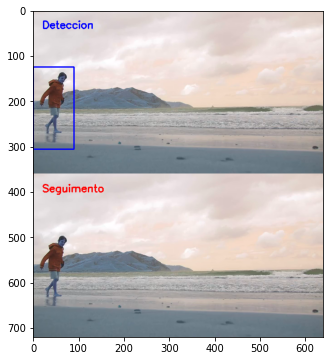

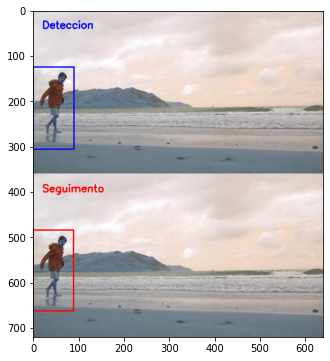

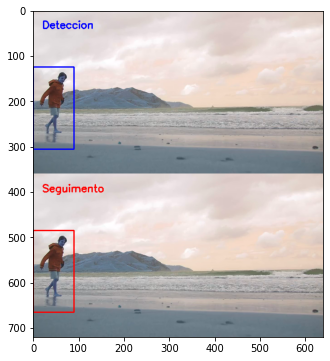

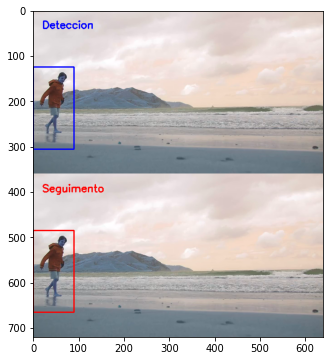

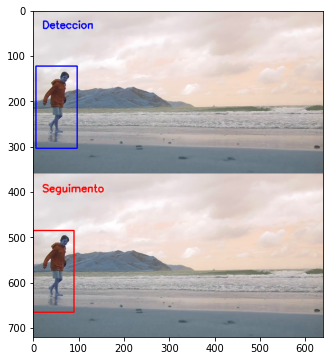

In [16]:
# dt para matriz de transición
dt = 0.0
# Xerador de números aleatorios para seleccionar frames aleatorios para actualizar
random.seed(42)

# Recorre o resto dos fotogramas
# Mostraremos a saída só dos primeiros 5 fotogramas
count = 0
while True:
    success, frame = cap.read()
    if not success:
        break

    # Variable para mostrar o resultado do seguimento
    frameDisplay = frame.copy()
    # Variable para mostrar o resultado da detección
    frameDisplayDetection = frame.copy()

    # Actualizar dt para a matriz de transición.
    # dt = tempo transcorrido.
    preTicks = ticks;
    ticks = cv2.getTickCount()
    dt = (ticks - preTicks) / cv2.getTickFrequency()

    KF.transitionMatrix[0, 3] = dt
    KF.transitionMatrix[1, 4] = dt
    KF.transitionMatrix[2, 5] = dt

    predictedMeasurement = KF.predict()

    # Detecta obxectos no marco actual
    objects, weights = hog.detectMultiScale(frame, winStride=(8, 8), padding=(32, 32),
                                            scale=1.05, hitThreshold=0, finalThreshold=1,
                                            useMeanshiftGrouping=False)
    if len(objects) > 0:
        # atopamos o obxecto mais grande
        objectDetected = maxRectArea(objects)

        # visualizamos o rectangulo
        x1, y1, w1, h1 = objectDetected.ravel()
        cv2.rectangle(frameDisplayDetection, (x1, y1), (x1+w1, y1+h1), red, 2, 4)

    # Actualizaremos as medicións o 15 % das veces.
     # Os fotogramas son elixidos ao azar.
    update = random.randint(0, 100) < 15

    if update:
        # Paso de actualización do filtro Kalman
        if len(objects) > 0:
            # Copia x, y, w do rectángulo detectado
            measurement = objectDetected[0:3].astype(np.float32)

            # Realiza o paso de actualización de Kalman
            updatedMeasurement = KF.correct(measurement)
            measurementWasUpdated = True
        else:
            # Non se actualizou a medición porque non se detectou ningún obxecto
            measurementWasUpdated = False
    else:
        # Non se actualizou a medición
        measurementWasUpdated = False

    if measurementWasUpdated:
        # Use a medición actualizada se a medición se actualizou
        objectTracked[0:3, 0] = updatedMeasurement[0:3, 0].astype(np.int32)
        objectTracked[3, 0] = 2*updatedMeasurement[2, 0].astype(np.int32)
    else:
        # Se a medición non se actualizou, use os valores previstos.
        objectTracked[0:3, 0] = predictedMeasurement[0:3, 0].astype(np.int32)
        objectTracked[3, 0] = 2*predictedMeasurement[2, 0].astype(np.int32)

    # Debuxa o obxecto rastrexado
    x2, y2, w2, h2 = objectTracked.ravel()
    cv2.rectangle(frameDisplay, (int(round(x2)), int(round(y2))), (int(round(x2+w2)), int(round(y2+h2))), blue, 2, 4)

    # Texto que indica seguimento ou detección.
    cv2.putText(frameDisplay, "Seguimento", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, blue, 2)
    cv2.putText(frameDisplayDetection, "Deteccion", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, red, 2)

    # Concatena verticalmente o resultado detectado e o resultado seguido
    output = np.concatenate((frameDisplayDetection, frameDisplay), axis=0)

    # Mostrar resultado.
    plt.imshow(output)
    plt.show()
    count += 1
    if count == 5:
        break

In [42]:
cap.release()

## <font style="color:rgb(50,120,229)">Resultados</font>
En primeiro lugar, ten en conta que os resultados do seguimento son moito máis suaves que os resultados da detección. Noutras palabras, o ruído no movemento de seguimento é menor que o ruído en repetidas deteccións. De aí, o nome de **filtrado de Kalman** onde se filtra o ruído.

En segundo lugar, a calidade do seguimento depende da incerteza no movemento. Se o movemento se axusta ao noso modelo de movemento, o seguimento producirá moi bos resultados. Non obstante, se o obxecto cambia de dirección bruscamente, a predición desactivarase ata que se use o paso de actualización.

Finalmente, o filtrado de Kalman que se mostra neste caderno non usa información de píxeles en absoluto para o seguimento. Pódense mellorar os resultados se usamos información de píxeles ademais da información de movemento? Por suposto, e iso é exactamente o que nos próximos cadernos.

# <font style="color:rgb(50,120,229)">Referencias e lecturas complementarias</font>

1. [https://medium.com/self-driving-cars/all-about-kalman-filters-8924abe3aa88](https://medium.com/self-driving-cars/all-about-kalman-filters-8924abe3aa88)

2. [https://www.researchgate.net/publication/224138621_Applications_of_Kalman_Filtering_in_Aerospace_1960_to_the_Present_Historical_Perspectives](https://www.researchgate.net/publication/224138621_Applications_of_Kalman_Filtering_in_Aerospace_1960_to_the_Present_Historical_Perspectives)

3. [http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/)

4. [Video Credit](https://www.videvo.net/video/young-boy-walking-along-windy-beach/5816/) ( Licensed under "Videvo Attribution License" from [videvo.net.  Author: Kiril Dobrev](https://www.videvo.net/profile/Kiril%20Videvo)). 